# 주로 사용하는 함수 선언

In [4]:
import os
import pandas as pd

# 폰트설정
import matplotlib.font_manager as fm
from matplotlib import rc

rc('font', family=fm.FontProperties(fname='C:/Users/HYUK/AppData/Local/Microsoft/Windows/Fonts/NotoSansKR-Thin.ttf').get_name())


dir_path = "../new_csv/"

# 해당 위치에 존재하는 파일들을 리스트로 반환하는 함수
def get_file_list(directory):
    file_list = []

    # 디렉터리 내의 모든 항목에 대해 반복합니다.
    for item in os.listdir(directory):
        # 전체 경로를 생성합니다.
        item_path = os.path.join(directory, item)

        # 파일인 경우에만 리스트에 추가합니다.
        if os.path.isfile(item_path):
            file_list.append(item)

    return file_list

file_path = get_file_list(dir_path)
print(file_path)

def read_csv(file_path : str, do_print : bool = True ):
    df = pd.read_csv(dir_path+file_path)
    if do_print :
        print(file_path,"\n")
        print("데이터 프레임 구조:", df.shape,"\n")
        print(df.head())
        print("\n데이터 정보 :\n")
        print(df.info())
        print("\nNan 값 존재 데이터")
        print(df[df.isnull().any(axis=1)])
    return df

def save_csv(file_path : str, df : pd.DataFrame, ):
    new_data_path = "../new_csv/new_"+file_path
    
    data_path_os = os.path.dirname(new_data_path)
    if not os.path.exists(data_path_os):
        os.makedirs(data_path_os)

    
    # 데이터 저장
    df.to_csv("../new_csv/new_"+file_path, index=False)

['new_GDP.csv', 'new_경제성장률.csv', 'new_국제_에너지_원자제가격.csv', 'new_미국_Fed_기준금리.csv', 'new_생산자물가지수.csv', 'new_소비자물가지수.csv', 'new_실업률.csv', 'new_원달러_환율.csv', 'new_은행대출금 연체율.csv', 'new_은행대출금_연체율.csv', 'new_주택매매가격지수.csv', 'new_통화량.csv', 'new_한국은행 기준금리.csv', 'new_한국은행_기준금리.csv']


# 2)시각화

## 2-1) 한국금리 시각화

In [9]:
df_itr= read_csv("new_한국은행_기준금리.csv")

new_한국은행_기준금리.csv 

데이터 프레임 구조: (306, 2) 

        변환  기준금리
0  1999/05  4.75
1  1999/06  4.75
2  1999/07  4.75
3  1999/08  4.75
4  1999/09  4.75

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변환      306 non-null    object 
 1   기준금리    306 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB
None

Nan 값 존재 데이터
Empty DataFrame
Columns: [변환, 기준금리]
Index: []


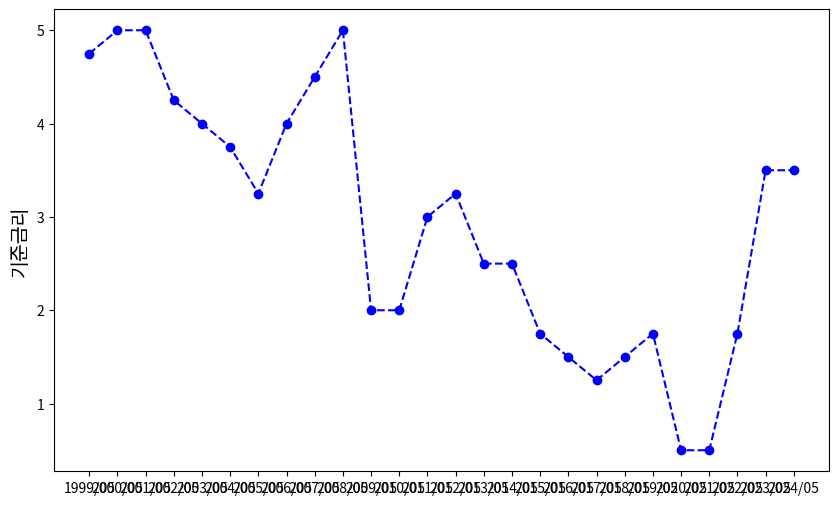

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
df_sampled = df_itr.iloc[::12]
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df_sampled['변환'], df_sampled[df_sampled.columns[1]], color='b', marker='o', linestyle='--', label='Year-over-Year Change')
ax1.set_ylabel('기준금리', fontsize=14)
ax1.tick_params(axis='y')

## 2-2) all 데이터 시각화

In [ ]:
dir_path = "../"
df = read_csv("all_data.csv")


all_data.csv 

데이터 프레임 구조: (844, 15) 

        변환  GDP_변동률  경제성장률  원유_변동률  미국금리  생산자물가지수(PPI)_증감률률  소비자물가지수(CPI)_변동률  \
0  1954/07      NaN    NaN     NaN  0.25                NaN               NaN   
1  1954/08      NaN    NaN     NaN  1.44                NaN               NaN   
2  1954/09      NaN    NaN     NaN  1.44                NaN               NaN   
3  1954/10      NaN    NaN     NaN  1.13                NaN               NaN   
4  1954/11      NaN    NaN     NaN  1.38                NaN               NaN   

   실업률  환율_변동율  기업대출  가계대출  신용카드대출  주택매매가격지수_변동율  통화량_변동율  기준금리  
0  NaN     NaN   NaN   NaN     NaN           NaN      NaN   NaN  
1  NaN     NaN   NaN   NaN     NaN           NaN      NaN   NaN  
2  NaN     NaN   NaN   NaN     NaN           NaN      NaN   NaN  
3  NaN     NaN   NaN   NaN     NaN           NaN      NaN   NaN  
4  NaN     NaN   NaN   NaN     NaN           NaN      NaN   NaN  

데이터 정보 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to